In [65]:
import numpy as np 
import pandas as pd 
import seaborn as sns 



Loading the dataset

In [66]:
df=pd.read_csv('Suicides in India 2001-2012.csv')

Cleaning the dataset

In [67]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [68]:
df.tail()

,State,Year,Type_code,Type,Gender,Age_group,Total
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189
237518,West Bengal,2012,Social_Status,Never Married,Male,0-100+,2658


In [69]:
df.shape
print("the number of rows are,",df.shape[0])
print("the number of columns are,",df.shape[1])

the number of rows are, 237519
the number of columns are, 7


In [70]:
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [71]:
# to check the unique names of state column
df['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [72]:
df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012])

In [73]:
df['Type_code'].unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

In [74]:
# Deleted the names of states which are not actually a state
states=['Total (All India)', 'Total (States)', 'Total (Uts)']
df=df[~df['State'].isin(states)]


In [75]:
df['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [76]:
#Removing the values from the column 'State' and making new dataframe, 'statewise_df'

statewise_df = df.drop(df[(df.State == 'Total (Uts)') | (df.State == 'Total (All India)') | 
               (df.State == 'Total (States)')].index)

In [77]:
statewise_df = statewise_df.drop(statewise_df[statewise_df['Total'] == 0].index)

In [78]:
#Renaming the 'Type' which has almost same meaning
statewise_df.replace('Bankruptcy or Sudden change in Economic', 
           'Bankruptcy or Sudden change in Economic Status', inplace=True)

In [79]:
statewise_df.replace('By Other means (please specify)', 'By Other means', inplace=True)

In [80]:
statewise_df.replace('Not having Children(Barrenness/Impotency',
           'Not having Children (Barrenness/Impotency)', inplace=True)

In [81]:
statewise_df = statewise_df.set_index(pd.Index([i for i in range(0,101110)]))
statewise_df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
1,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
2,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
3,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
4,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8
...,...,...,...,...,...,...,...
101105,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
101106,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
101107,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
101108,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [82]:
import seaborn as sns  #https://seaborn.pydata.org/generated/seaborn.set_style.html
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
#We use rc i.e a runtime configuration (rc) containing the default styles for every plot element you create
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Total number of suicides in each year:  Year
2001    542440
2002    551980
2003    554218
2004    568349
2005    569545
2006    590543
2007    613119
2008    625014
2009    635429
2010    672926
2011    677159
2012    647288
Name: Total, dtype: int64


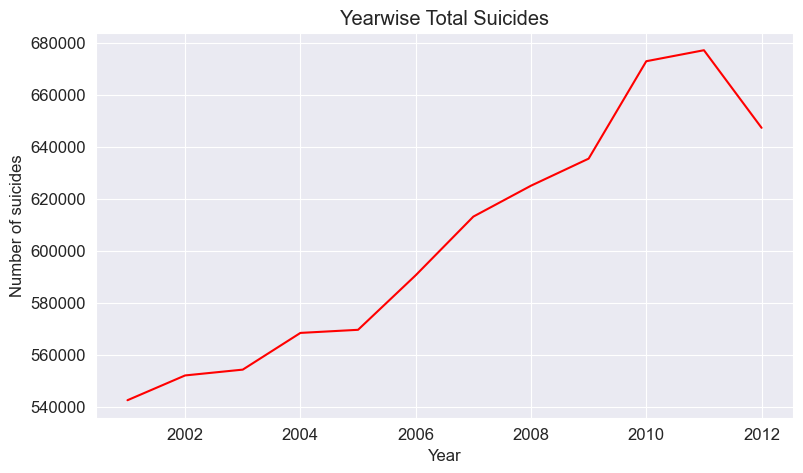

In [83]:
# Q.1 Yearwise Total Number Of Deaths

#Creating a series of total suicides according to year

yearwise_total_suicide = statewise_df.groupby("Year")["Total"].sum()
print('Total number of suicides in each year: ', yearwise_total_suicide)

#plotting this in a line graph
yearwise_total_suicide.plot(kind="line", figsize = (9,5), color = 'r')
plt.title('Yearwise Total Suicides')
plt.xlabel('Year')
plt.ylabel('Number of suicides');

# Observations about above graph
The number of Suicides has remarkably increased from the year 2002 to 2012.
It can be observed that the graph trend is increased from 2002 to 2010 but a certain decrease in trend is observed after 2011.
The lowest number of suicides is 540000 in year 2002 and highest number is 680000 in 2011.

Total number of suicides by states:  State
A & N Islands          8109
Andhra Pradesh       814059
Arunachal Pradesh      6633
Assam                172276
Bihar                 46214
Chandigarh             5164
Chhattisgarh         302354
D & N Haveli           3430
Daman & Diu            1391
Delhi (Ut)            84272
Goa                   17363
Gujarat              330858
Haryana              147176
Himachal Pradesh      26562
Jammu & Kashmir       14821
Jharkhand             49720
Karnataka            734825
Kerala               538946
Lakshadweep              50
Madhya Pradesh       451535
Maharashtra          901945
Manipur                2102
Meghalaya              5415
Mizoram                4154
Nagaland               1728
Odisha               267234
Puducherry            32144
Punjab                46350
Rajasthan            255134
Sikkim                 9606
Tamil Nadu           818691
Tripura               45965
Uttar Pradesh        233352
Uttarakhand           18496
West 

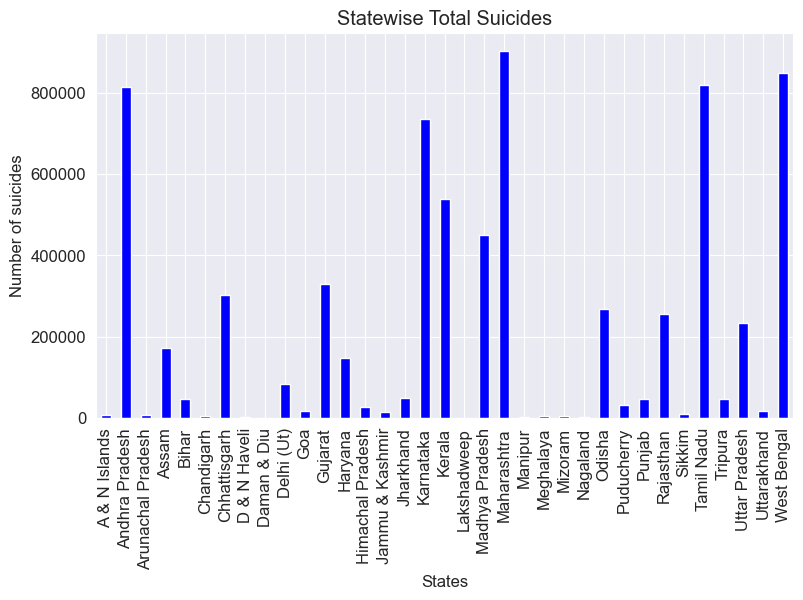

In [84]:
# Q2. Statewise Number Of Suicides  - use bar graph

statewise_total_suicide = statewise_df.groupby("State")["Total"].sum()
print('Total number of suicides by states: ', statewise_total_suicide)

#plotting this in a line graph
statewise_total_suicide.plot(kind="bar", figsize = (9,5), color = 'b')
plt.title('Statewise Total Suicides')
plt.xlabel('States')
plt.ylabel('Number of suicides');

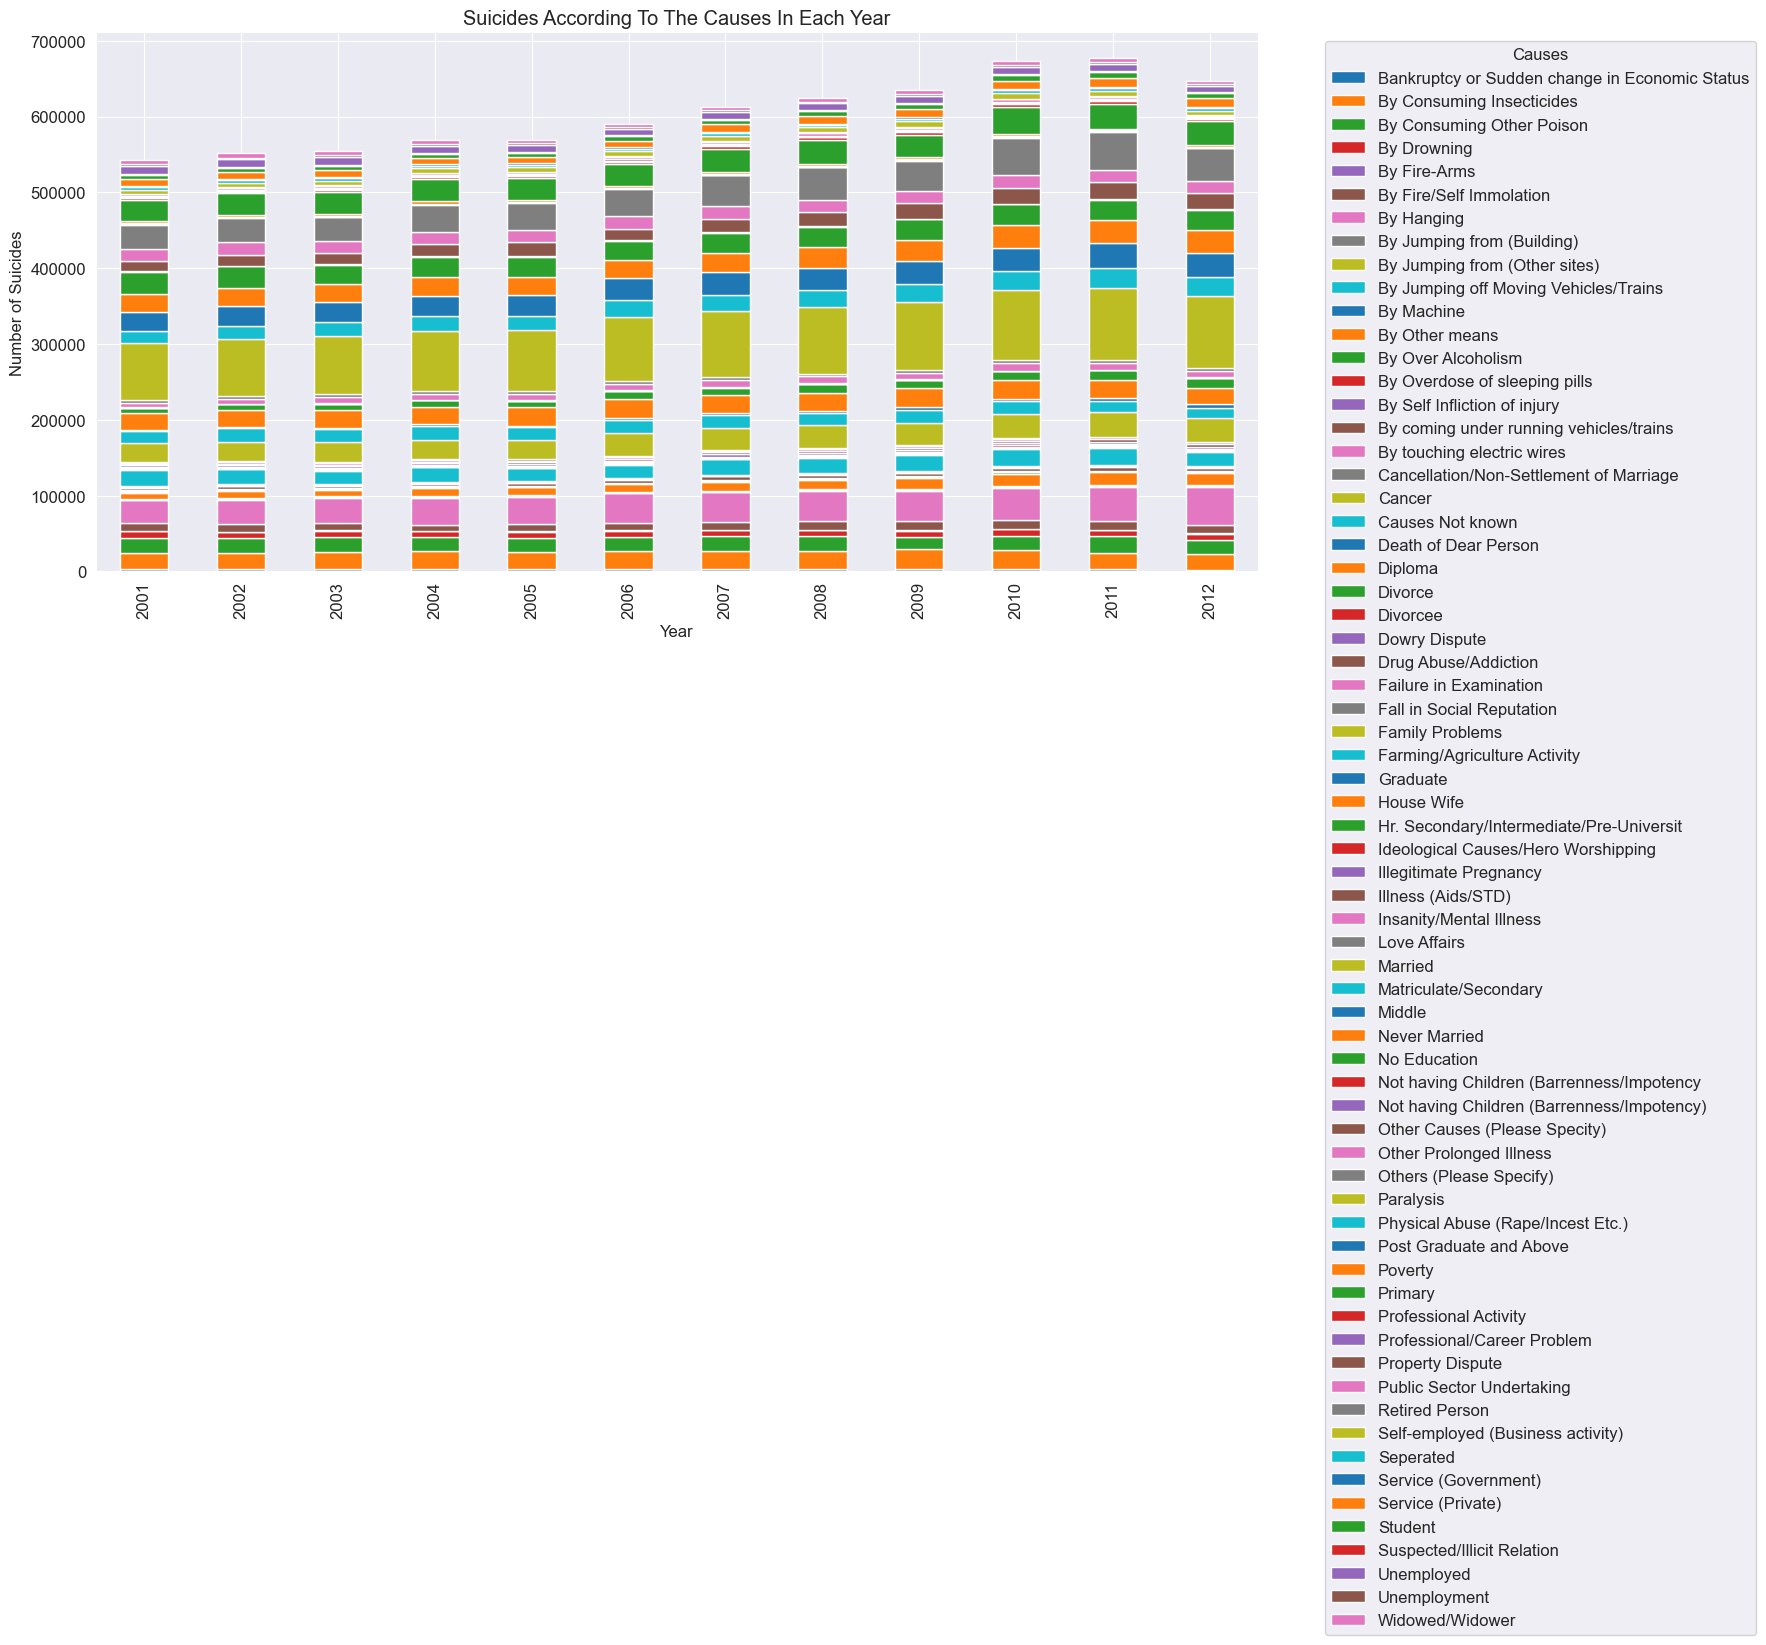

In [85]:
# Q3 Suicides According To The Causes In Each Year

# Grouping the data by Year and Type to get the total number of suicides for each cause in each year
causewise_yearly_suicide = statewise_df.groupby(["Year", "Type"])["Total"].sum().unstack()

# Plotting the data
causewise_yearly_suicide.plot(kind="bar", stacked=True, figsize=(15, 7))
plt.title('Suicides According To The Causes In Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.legend(title='Causes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Gender
Male      54841
Female    46269
Name: count, dtype: int64


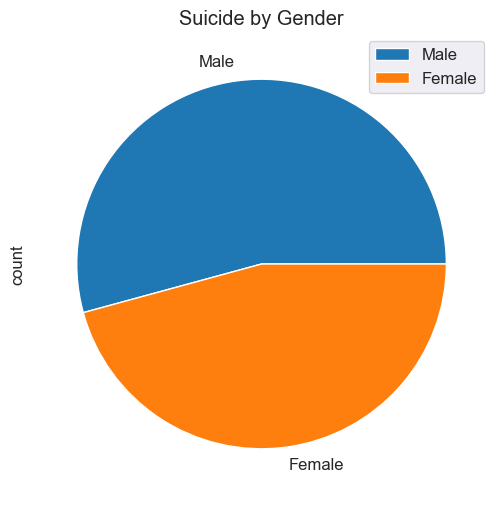

In [86]:
# Q.4 Suicide According To Gender

#Gender Suicide Frequency
#counts = statewise_df['Gender'].value_counts().sort_index()
counts = statewise_df['Gender'].value_counts()
print(counts)

# Plot a pie chart
counts.plot(kind='pie', title='Suicide by Gender',figsize=(6,6))
plt.legend()
plt.show()

The number of females undergoing suicide is very less than the males. 

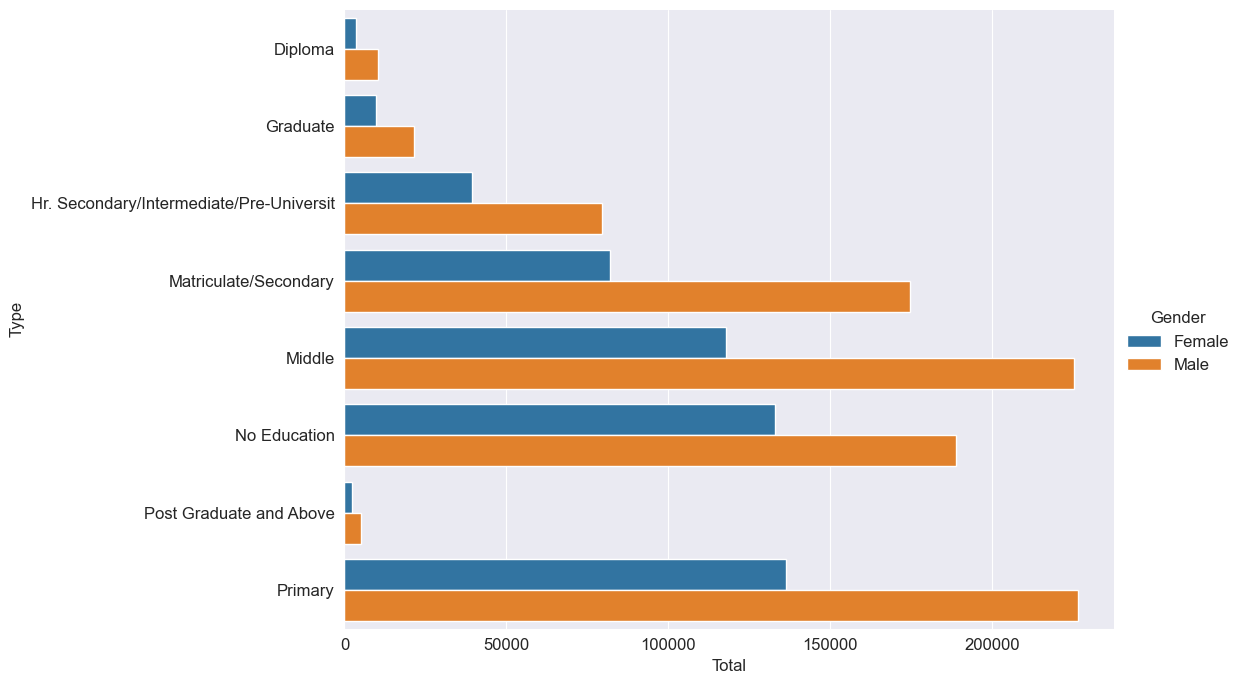

In [87]:
# Q5 Suicides By The Educational Background according to gender

#filtering the data as per the educational background
education_status = pd.DataFrame(statewise_df[statewise_df["Type_code"]=="Education_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
education_status

#plotting the above data
g = sns.catplot(y="Type", x="Total",hue="Gender", kind="bar", data=education_status,height=7, aspect=11.7/7);
sns.set_style('whitegrid');

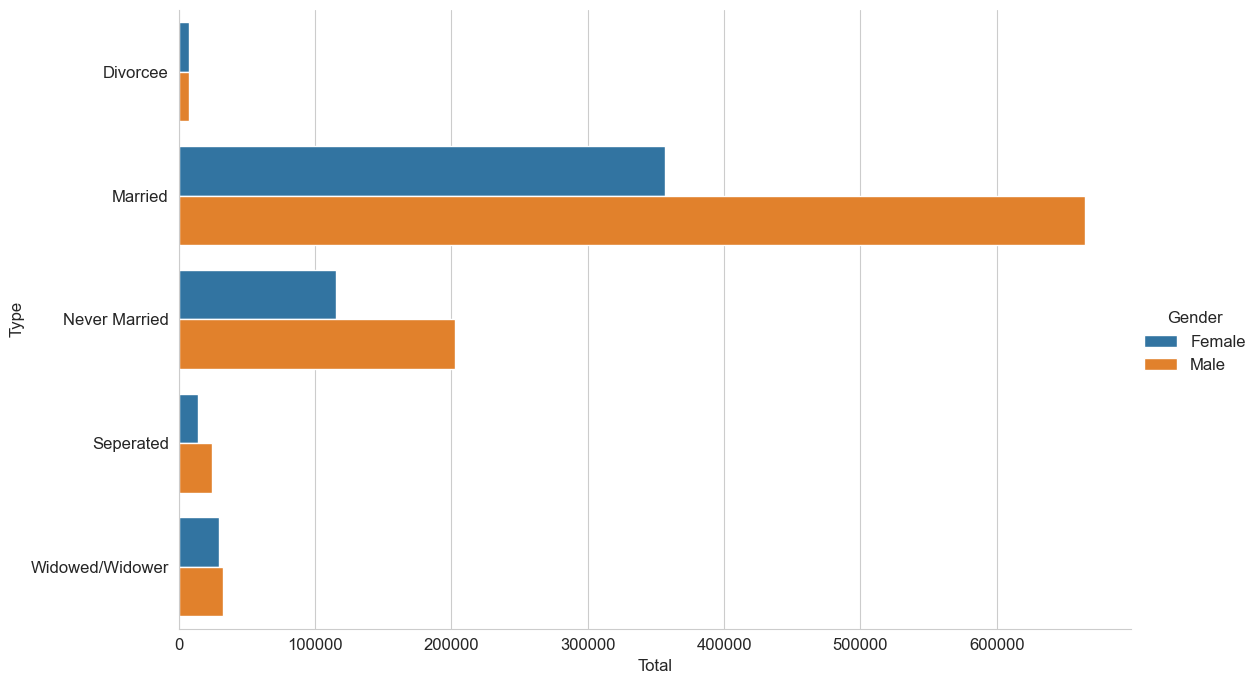

In [88]:
# Q6.Suicides By Social Status

#filtering the data as per the social background
social_status = pd.DataFrame(statewise_df[statewise_df["Type_code"]=="Social_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
social_status

#plotting the above data
g = sns.catplot(y="Type", x="Total",hue="Gender", kind="bar", data=social_status,height=7, aspect=11.7/7);
sns.set_style('whitegrid');

Age_group
0-14      9639
15-29    24960
30-44    24064
45-59    19730
60+      13766
Name: count, dtype: int64


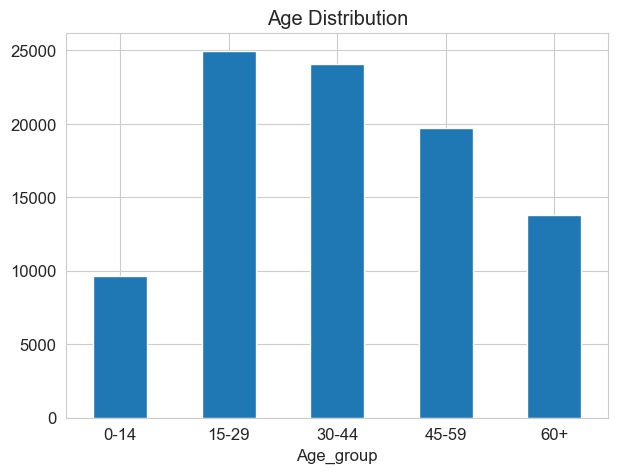

In [89]:
# Q6.Suicides By Social Status

#Age Distributiion
statewise_Age_df = statewise_df.drop(statewise_df[statewise_df.Age_group == '0-100+'].index)

counts = statewise_Age_df['Age_group'].value_counts().sort_index()
print(counts)

counts.plot(kind='bar', title='Age Distribution',figsize=(7,5))
plt.xticks(rotation=0)
plt.show()

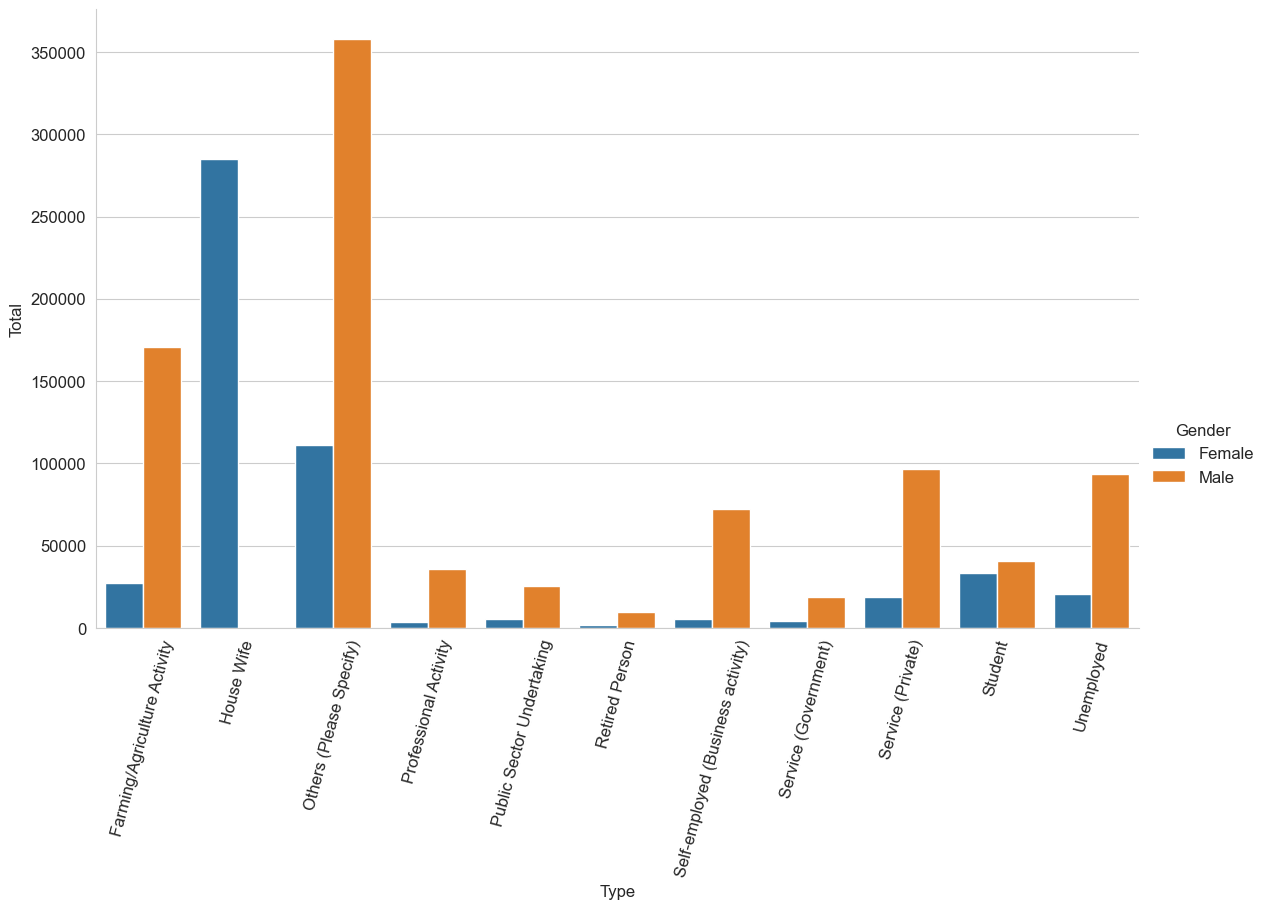

In [90]:
# Q7 People of which professional background has committed more suicides?

filter_social_status = pd.DataFrame(statewise_df[statewise_df["Type_code"]=="Professional_Profile"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=7, aspect=11.7/7);
g.set_xticklabels(rotation=75);
